**Analysis performed by fgjspaceman**

**16/10/2023**

<br>

# <span style="color:#5E6997"> Crypto DeFi Market Analysis (Data Analysis / Python) </span>

## <span style="color:#5E6997"> Part 1. Extracting, Cleaning, Features Engineering </span>

<br>
<br>


### **Table of Contents**
* [<span style="color:#A690A4"> 0. Introduction](#intro)
* [<span style="color:#A690A4"> 1. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 2. Exploratory Data Analysis / Python Kernel](#process)
* [<span style="color:#A690A4"> 3. Final pivot table 'pivot_dex' / Python Kernel](#pivot)

    
<br>
<br>

## <span style="color:#5E6997"> Introduction </span> <a class="anchor" id="intro"></a>
    
**Preface**:
I am going to perform a market analysis of the crypto DeFi ecosystem. For this analysis I will use the monthly volume of each DEX to uncover insights, market comprehension and opportunities. The entire work will be splitted into two parts. Here is the first part, EDA, where I am getting the data ready for the market analysis. 
    
I extracted the data myself using Dune Analytics console. My goal on the first part is to give you an overview on how to get data ready for further analysis. This involves organizing the data, creating and adding new variables from 'internal' and external data sources. 

    
**Data Source**:
Data has been extracted by myself using Dune Analytics (on-chain data). As well as using Yfinance API.
      
   
    
## <span style="color:#5E6997"> Executive Summary </span> <a class="anchor" id="exe_sum"></a>

### Features Engineering
* Total_Monthly_Volume : total DeFi market volume
* 'Month' : month of the year (1: January, 2: February, etc..)
* 'Season' : Seasons of the year 
* 'BTC_Price' : Bitcoin price close for each period (index) 
    

### Objective & Scope
* Collect, clean & features engineering 
* Identify and create variables of interest
* Prepare data and import useful data for Part 2. 'DeFi Market Analysis' 
* Create a pivot table ready for market analysis for Part 2. 
* Share methodology and process
* Save to csv
    
### Methodology
* **Collect** data using dataset "[crypto-dex-monthly-volume](https://www.kaggle.com/datasets/franoisgeorgesjulien/crypto-dex-monthly-volume)"
* **Explore** data using available techniques
* **Wrangle & Features Engineering** to prepare dataframe for part 2 
    
    
    

# <span style="color:#5E6997"> Exploratory Data Analysis </span> <a class="anchor" id="process"></a>


In [1]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290463 sha256=de53ede0eb5daabe54ead4a8cff967124be8ad37acf4888e5e881360848990a3
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
df = pd.read_csv('/kaggle/input/crypto-dex-monthly-volume/QUERY_DB_DEX_VOLUME_MONTHLY - ORIGINAL-DB-DEX_VOLUME_MONTHLY.csv')

In [4]:
df.head()

,Project,Month,Monthly Volume
0,spiritswap,2023-04-01,5 888 666
1,balancer,2023-04-01,1 471 773 238
2,curve,2023-04-01,3 595 163 230
3,apeswap,2023-04-01,35 551 463
4,iziswap,2023-04-01,4 302 574


In [5]:
df.shape

(848, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Project         848 non-null    object
 1   Month           848 non-null    object
 2   Monthly Volume  848 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB


In [7]:
unique_counts = df.nunique()
unique_counts

Project            47
Month              25
Monthly Volume    847
dtype: int64

In [8]:
nan_values = df.isna()

In [9]:
any_missing_values = nan_values.any().any()

any_missing_values_in_column = nan_values.any()

missing_value_count = df.isnull().sum()

for column, has_missing in any_missing_values_in_column.items():
    if has_missing:
        count = missing_value_count[column]
        print(f"-----> Column '{column}' has {count} missing values.")
        
print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

print("\nMissing Values in Each Column?")
print(any_missing_values_in_column)


Missing Values in the Entire DataFrame?
False

Missing Values in Each Column?
Project           False
Month             False
Monthly Volume    False
dtype: bool


### Renaming column 'Monthly Volume'to 'Monthly_Volume'

In [10]:
df = df.rename(columns={'Monthly Volume': 'Monthly_Volume'})

### Removing space within our column "Monthly_Volume" to convert it to numeric dtype

In [11]:
df['Monthly_Volume'] = df['Monthly_Volume'].str.replace('\u202F', '', regex=True)
df['Monthly_Volume'] = pd.to_numeric(df['Monthly_Volume'], errors='coerce')

### Converting Month to datetime

In [12]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d', errors='coerce')

In [13]:
df.head()

,Project,Month,Monthly_Volume
0,spiritswap,2023-04-01,5888666
1,balancer,2023-04-01,1471773238
2,curve,2023-04-01,3595163230
3,apeswap,2023-04-01,35551463
4,iziswap,2023-04-01,4302574


In [14]:
df.shape

(848, 3)

In [15]:
unique_counts = df.nunique()
unique_counts

Project            47
Month              25
Monthly_Volume    847
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Project         848 non-null    object        
 1   Month           848 non-null    datetime64[ns]
 2   Monthly_Volume  848 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.0+ KB


### EDA - Projects (DEXs) launch - stop

In [17]:
# Since all DEX did not launch at the same time
# We can group and filter using Month and Monthly_Volume,
# To see which DEXs have values in Monthly_Volume for each Month

df_with_volume = df[df['Monthly_Volume'].notnull()]

project_count_per_month = df_with_volume.groupby('Month')['Project'].nunique()
project_count_per_month = project_count_per_month.reset_index().rename(columns={'Project': 'Project_Count'})

project_count_per_month


,Month,Project_Count
0,2021-04-01,17
1,2021-05-01,19
2,2021-06-01,22
3,2021-07-01,23
4,2021-08-01,24
5,2021-09-01,25
6,2021-10-01,26
7,2021-11-01,28
8,2021-12-01,29
9,2022-01-01,31


In [18]:
# for ease of reading we order by DESC 

project_counts = df['Monthly_Volume'].groupby(df['Project']).count().reset_index()
project_counts = project_counts.rename(columns={'Monthly_Volume': 'Count'})

project_counts = project_counts.sort_values(by='Count', ascending=False)
project_counts = project_counts.reset_index(drop=True)

project_counts

,Project,Count
0,Bancor Network,25
1,ellipsis_finance,25
2,uniswap,25
3,swapr,25
4,sushiswap,25
5,spookyswap,25
6,spiritswap,25
7,pancakeswap,25
8,mstable,25
9,DODO,25


In [19]:
# We can now have a look at some projects launch dates 
# As well as projects that stop operating
# Obviously some projects were already launched (our dataset goes back to 2021-04-01)

project_dates = df.groupby('Project')['Month'].agg(['min', 'max']).reset_index()

project_dates = project_dates.rename(columns={'min': 'Launch_Date', 'max': 'Stop_Date'})

project_dates['Status'] = project_dates['Stop_Date'].apply(lambda x: 'ON' if x == pd.to_datetime('2023-04-01') else 'OFF')

project_counts = project_counts.merge(project_dates, on='Project')
project_counts

,Project,Count,Launch_Date,Stop_Date,Status
0,Bancor Network,25,2021-04-01,2023-04-01,ON
1,ellipsis_finance,25,2021-04-01,2023-04-01,ON
2,uniswap,25,2021-04-01,2023-04-01,ON
3,swapr,25,2021-04-01,2023-04-01,ON
4,sushiswap,25,2021-04-01,2023-04-01,ON
5,spookyswap,25,2021-04-01,2023-04-01,ON
6,spiritswap,25,2021-04-01,2023-04-01,ON
7,pancakeswap,25,2021-04-01,2023-04-01,ON
8,mstable,25,2021-04-01,2023-04-01,ON
9,DODO,25,2021-04-01,2023-04-01,ON


In [20]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Project,Month,Monthly_Volume


### Creating pivot table 'pivot_dex'

#### We now have a better understanding of our dataset

#### So we can create a pivot table for further analysis

In [21]:
pivot_dex = pd.pivot_table(df, values='Monthly_Volume', index='Month', columns='Project', fill_value=0)

# Display the pivot table
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,synthetix,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,166334645,237720112,5838444,207367016,0,0,148971753,0,0,0,...,0,0,2011936768,0,0,0,0,0,0,0
2021-05-01,5478141811,4563856165,188868271,2315517194,0,0,4325119635,0,139310901,0,...,0,0,90829997772,0,0,0,0,0,0,0
2021-06-01,1726793511,5174964339,55638331,749242858,0,312389063,1356922016,0,1671910723,10285,...,0,5,59292663051,0,0,0,0,0,0,0
2021-07-01,1231557520,3550014644,46526656,886020837,0,212943364,1492908501,0,1166319308,35689964,...,0,21960716,39845604044,0,0,0,0,0,0,0
2021-08-01,2036522000,4278750518,84383716,1472379462,0,625552466,1676822015,0,2707696915,54787075,...,0,1383065891,54730196334,0,0,0,0,0,0,0


In [22]:
pivot_dex.columns

Index(['Bancor Network', 'DODO', 'airswap', 'apeswap', 'arbswap', 'babyswap',
       'balancer', 'beethoven_x', 'biswap', 'clipper', 'curve', 'defiswap',
       'dfx', 'ellipsis_finance', 'equalizer_exchange', 'fraxswap', 'glacier',
       'gmx', 'hashflow', 'integral', 'iziswap', 'kyberswap', 'maverick',
       'mdex', 'mstable', 'nomiswap', 'onepunchswap', 'pancakeswap',
       'platypus_finance', 'quickswap', 'rubicon', 'shibaswap',
       'spartacus_exchange', 'spiritswap', 'spookyswap', 'sushiswap', 'swapr',
       'synthetix', 'trader_joe', 'uniswap', 'velodrome', 'verse_dex',
       'wigoswap', 'wombat', 'woofi', 'zigzag', 'zipswap'],
      dtype='object', name='Project')

### New column 'Total_Monthly_Volume'

In [23]:
# We can sum the total volume of each month creating new column 'Total_Monthly_Volume'

pivot_dex['Total_Monthly_Volume'] = pivot_dex.sum(axis=1)

pivot_dex

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,166334645,237720112,5838444,207367016,0,0,148971753,0,0,0,...,0,2011936768,0,0,0,0,0,0,0,8781053472
2021-05-01,5478141811,4563856165,188868271,2315517194,0,0,4325119635,0,139310901,0,...,0,90829997772,0,0,0,0,0,0,0,281987698859
2021-06-01,1726793511,5174964339,55638331,749242858,0,312389063,1356922016,0,1671910723,10285,...,5,59292663051,0,0,0,0,0,0,0,130044898807
2021-07-01,1231557520,3550014644,46526656,886020837,0,212943364,1492908501,0,1166319308,35689964,...,21960716,39845604044,0,0,0,0,0,0,0,93284555501
2021-08-01,2036522000,4278750518,84383716,1472379462,0,625552466,1676822015,0,2707696915,54787075,...,1383065891,54730196334,0,0,0,0,0,0,0,125161244035
2021-09-01,1733767898,4381675902,122840528,1476142447,0,1748845520,2356330867,200149,3255338755,64689406,...,5450044841,54065940927,0,0,0,0,0,0,0,135050694873
2021-10-01,1564706183,4697736487,101417115,1406238212,0,1307113774,3199329024,433032844,3133341072,54996725,...,7211123939,63464770105,0,0,0,0,177916,0,0,164773836101
2021-11-01,1815138173,4524435933,107733796,2305040809,0,4471864431,3404912946,425871126,5829197377,32392612,...,16098707452,90679981026,0,0,0,0,2849535,0,0,231777364566
2021-12-01,1367024791,4333510925,132120614,1257346130,0,6415568444,3647576632,383991765,8010369843,45705611,...,15426860138,87240789860,0,0,0,0,33113182,0,15378,209523549193


### Applying division (1e9) to all values for better readability 

In [24]:
# I will devide all values by billion 
pivot_dex = pivot_dex / 1e9

In [25]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume
Month,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,0.000000e+00,2.011937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,0.000000e+00,90.829998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.987699
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,5.000000e-09,59.292663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.044899
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,2.196072e-02,39.845604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.284556
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,1.383066e+00,54.730196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.161244


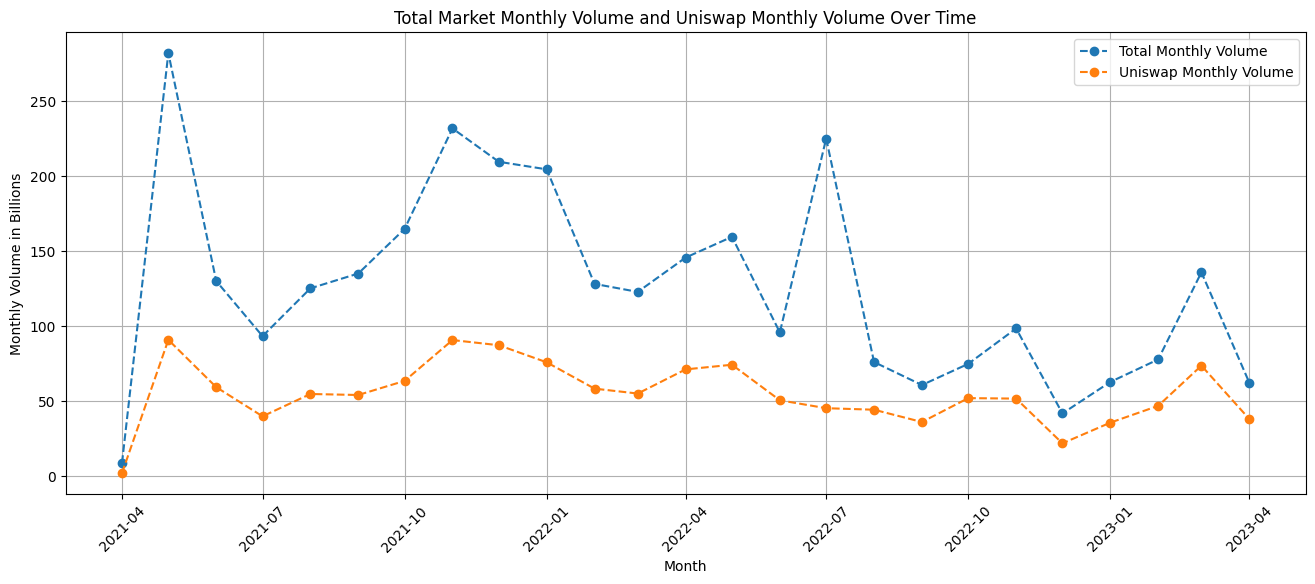

In [26]:
# Simple line chart to get an overview of our data

total_monthly_volume = pivot_dex['Total_Monthly_Volume']
uniswap_market_share = pivot_dex['uniswap']

plt.figure(figsize=(16, 6))
plt.plot(total_monthly_volume.index, total_monthly_volume.values, marker='o', linestyle='--', label='Total Monthly Volume')

plt.plot(uniswap_market_share.index, uniswap_market_share.values, marker='o', linestyle='--', label='Uniswap Monthly Volume')

plt.title('Total Market Monthly Volume and Uniswap Monthly Volume Over Time')
plt.xlabel('Month')
plt.ylabel('Monthly Volume in Billions')
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [27]:
pivot_dex.shape

(25, 48)

### Renaming index to 'Date'

In [28]:
# Renaming our pivot_dex index
pivot_dex.index = pivot_dex.index.rename("Date")

In [29]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,trader_joe,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,0.000000e+00,2.011937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,0.000000e+00,90.829998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.987699
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,5.000000e-09,59.292663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.044899
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,2.196072e-02,39.845604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.284556
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,1.383066e+00,54.730196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.161244


### Adding a Month Column (numeric - categorical 1 - 12)

In [30]:
# Adding a column 'Month' to our pivot
pivot_dex['Month'] = pivot_dex.index.month

In [31]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,uniswap,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,2.011937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,90.829998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.987699,5
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,59.292663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.044899,6
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,39.845604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.284556,7
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,54.730196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.161244,8


### Creating a Season Column

In [32]:
# Adding a column 'Season' to track seasons 

def get_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Fall"
    else:
        return "Winter"

pivot_dex['Season'] = pivot_dex['Month'].apply(get_season)

In [33]:
pivot_dex.head(1)

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,velodrome,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month,Season
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.23772,0.005838,0.207367,0.0,0.0,0.148972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4,Spring


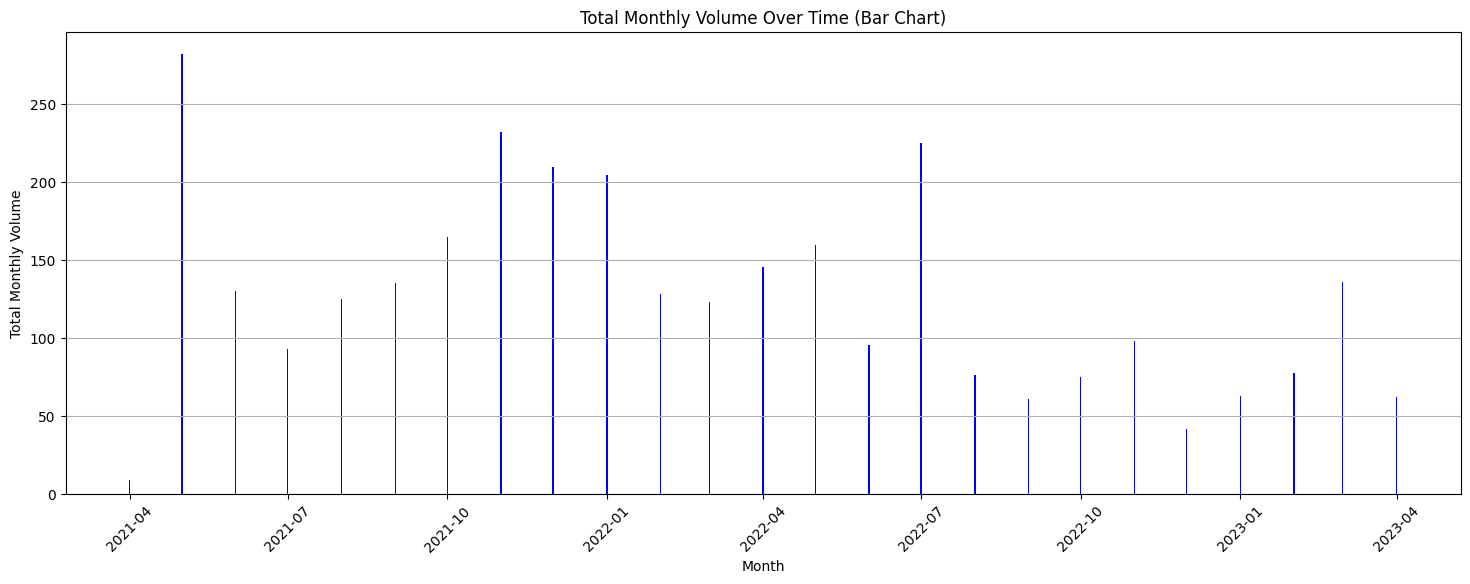

In [34]:
# Plotting a simple bar chart to have a look at data

plt.figure(figsize=(18, 6))
plt.bar(pivot_dex.index, pivot_dex['Total_Monthly_Volume'], color='b')
plt.title('Total Monthly Volume Over Time (Bar Chart)')
plt.xlabel('Month')
plt.ylabel('Total Monthly Volume')
plt.grid(axis='y')

plt.xticks(rotation=45)

plt.show()


### Importing BTC PRICE from yfinance
#### For further analysis we will add the Bitcoin price for each month
#### Might be useful to track & understand trends within the DeFi ecosystem

In [35]:
start_date = '2021-04-01'
end_date = '2023-05-01'

btc_data = yf.download('BTC-USD', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [36]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,58926.562500,59586.070312,58505.277344,59095.808594,59095.808594,61669163792
2021-04-02,59098.878906,60267.187500,58869.281250,59384.312500,59384.312500,58727860620
2021-04-03,59397.410156,60110.269531,57603.890625,57603.890625,57603.890625,59641344484
2021-04-04,57604.839844,58913.746094,57168.675781,58758.554688,58758.554688,50749662970
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,60706272115


In [37]:
# Filtering btc_data to keep only the first day of each month
btc_data = btc_data[btc_data.index.day == 1]

In [38]:
pivot_dex['BTC_Price'] = btc_data['Close'].values

In [39]:
pivot_dex.head(1)

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month,Season,BTC_Price
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.23772,0.005838,0.207367,0.0,0.0,0.148972,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4,Spring,59095.808594


In [40]:
# Adding the column to our pivot
pivot_dex['BTC_Price'] = pivot_dex['BTC_Price'].astype(int)

## <span style="color:#5E6997"> Final pivot table / Python Kernel </span> <a class="anchor" id="pivot"></a>

### Including all new features and formatted data 

In [41]:
pivot_dex.head()

Project,Bancor Network,DODO,airswap,apeswap,arbswap,babyswap,balancer,beethoven_x,biswap,clipper,...,verse_dex,wigoswap,wombat,woofi,zigzag,zipswap,Total_Monthly_Volume,Month,Season,BTC_Price
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,0.166335,0.237720,0.005838,0.207367,0.0,0.000000,0.148972,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,8.781053,4,Spring,59095
2021-05-01,5.478142,4.563856,0.188868,2.315517,0.0,0.000000,4.325120,0.0,0.139311,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,281.987699,5,Spring,57828
2021-06-01,1.726794,5.174964,0.055638,0.749243,0.0,0.312389,1.356922,0.0,1.671911,0.000010,...,0.0,0.0,0.0,0.0,0.0,0.0,130.044899,6,Summer,36684
2021-07-01,1.231558,3.550015,0.046527,0.886021,0.0,0.212943,1.492909,0.0,1.166319,0.035690,...,0.0,0.0,0.0,0.0,0.0,0.0,93.284556,7,Summer,33572
2021-08-01,2.036522,4.278751,0.084384,1.472379,0.0,0.625552,1.676822,0.0,2.707697,0.054787,...,0.0,0.0,0.0,0.0,0.0,0.0,125.161244,8,Summer,39974


In [42]:
pivot_dex.columns

Index(['Bancor Network', 'DODO', 'airswap', 'apeswap', 'arbswap', 'babyswap',
       'balancer', 'beethoven_x', 'biswap', 'clipper', 'curve', 'defiswap',
       'dfx', 'ellipsis_finance', 'equalizer_exchange', 'fraxswap', 'glacier',
       'gmx', 'hashflow', 'integral', 'iziswap', 'kyberswap', 'maverick',
       'mdex', 'mstable', 'nomiswap', 'onepunchswap', 'pancakeswap',
       'platypus_finance', 'quickswap', 'rubicon', 'shibaswap',
       'spartacus_exchange', 'spiritswap', 'spookyswap', 'sushiswap', 'swapr',
       'synthetix', 'trader_joe', 'uniswap', 'velodrome', 'verse_dex',
       'wigoswap', 'wombat', 'woofi', 'zigzag', 'zipswap',
       'Total_Monthly_Volume', 'Month', 'Season', 'BTC_Price'],
      dtype='object', name='Project')

### Saving & exporting our pivot_dex to csv

In [43]:
pivot_dex.to_csv('crypto_dex_data.csv', index=True)

In [44]:
dex_df = pivot_dex.drop(['Total_Monthly_Volume','Month', 'Season', 'BTC_Price'], axis=1)

project_total_volume = dex_df.sum()
project_total_volume = project_total_volume.sort_values(ascending=False)

top_10_projects = project_total_volume.head(10)
top_10_projects = top_10_projects.round(2)

top_10_projects

Project
uniswap        1372.40
pancakeswap     452.24
curve           280.73
sushiswap       222.85
balancer        222.31
DODO            113.68
mdex            109.59
trader_joe       81.64
spookyswap       64.37
biswap           53.00
dtype: float64

In [45]:
total_monthly_volume_total = pivot_dex['Total_Monthly_Volume'].sum()
total_monthly_volume_total

3152.162081035

In [46]:
market_share = (top_10_projects / total_monthly_volume_total) * 100
market_share

Project
uniswap        43.538370
pancakeswap    14.346978
curve           8.905951
sushiswap       7.069751
balancer        7.052620
DODO            3.606414
mdex            3.476661
trader_joe      2.589968
spookyswap      2.042090
biswap          1.681386
dtype: float64

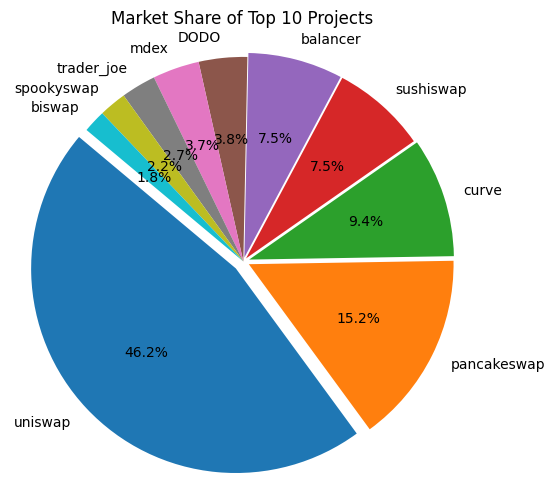

In [47]:
labels = market_share.index
sizes = market_share.values
explode = (0.05, 0.03, 0.03, 0.02, 0.02, 0, 0, 0, 0, 0)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Top 10 Projects')
plt.axis('equal')

plt.show()

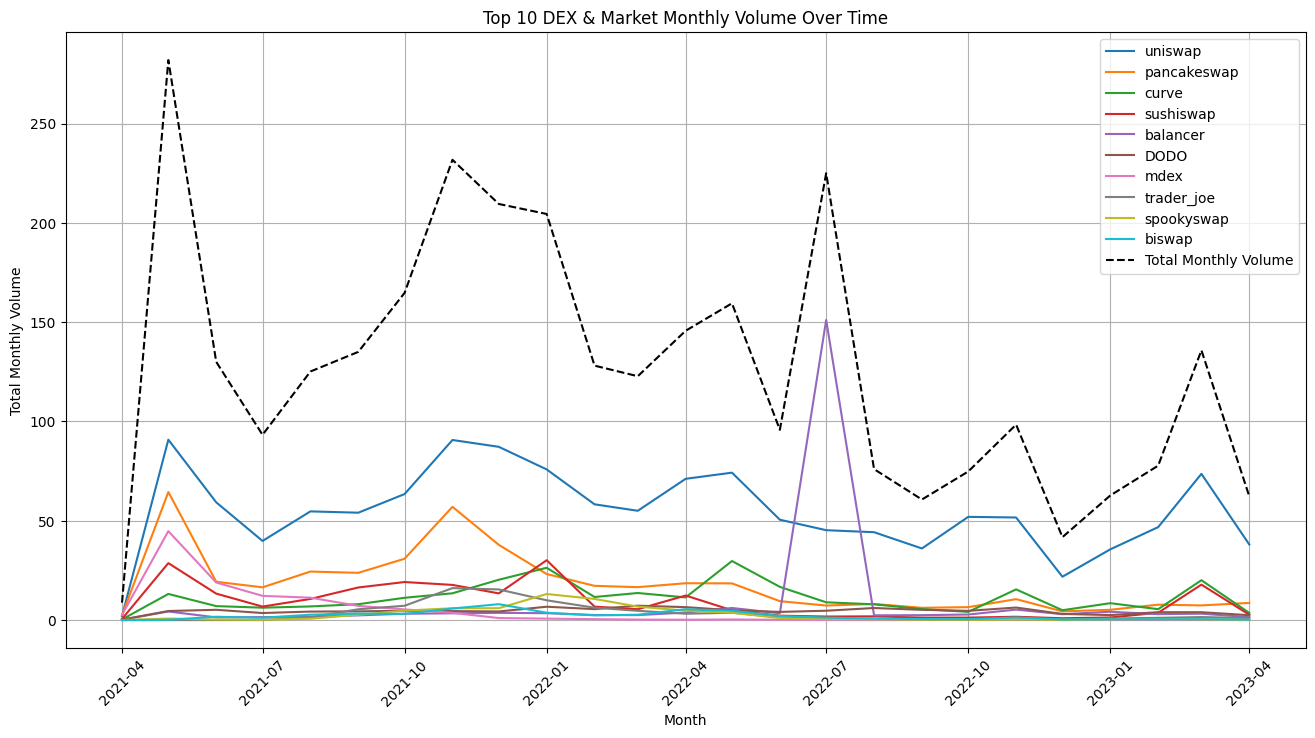

In [48]:
projects_to_plot = ['uniswap', 'pancakeswap', 'curve', 'sushiswap', 'balancer',
                    'DODO', 'mdex', 'trader_joe', 'spookyswap', 'biswap']

plt.figure(figsize=(16, 8))

for project in projects_to_plot:
    plt.plot(pivot_dex.index, pivot_dex[project], label=project)

plt.plot(pivot_dex.index, pivot_dex['Total_Monthly_Volume'], label='Total Monthly Volume', linestyle='--', color='black')

plt.xlabel('Month')
plt.ylabel('Total Monthly Volume')
plt.title('Top 10 DEX & Market Monthly Volume Over Time')

plt.legend()

plt.xticks(rotation=45)

plt.grid(True)
plt.show()


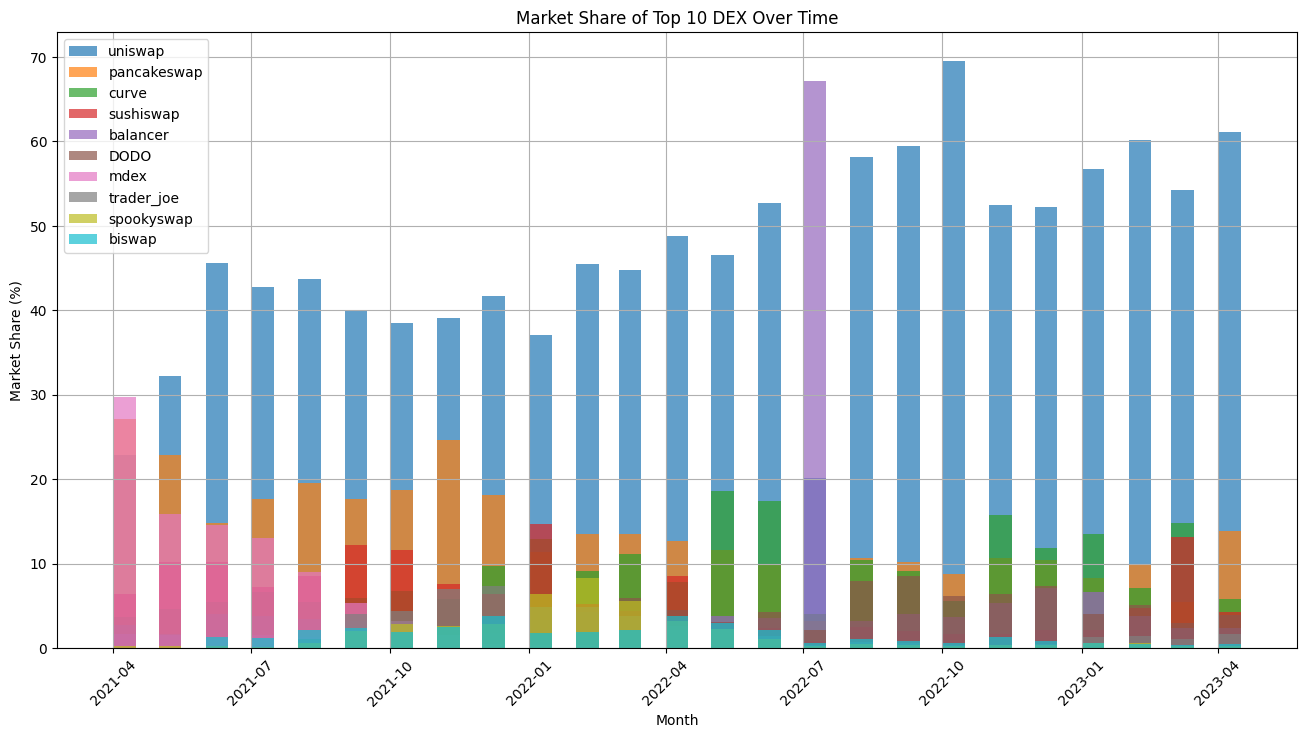

In [49]:
projects_to_plot = ['uniswap', 'pancakeswap', 'curve', 'sushiswap', 'balancer',
                    'DODO', 'mdex', 'trader_joe', 'spookyswap', 'biswap']

plt.figure(figsize=(16, 8))

for project in projects_to_plot:
    pivot_dex[project + '_Market_Share'] = (pivot_dex[project] / pivot_dex['Total_Monthly_Volume']) * 100

bar_width = 15  

for i, project in enumerate(projects_to_plot):
    plt.bar(
        pivot_dex.index,
        pivot_dex[project + '_Market_Share'],
        label=project,
        width=bar_width,
        align='edge',
        alpha=0.7,
    )

plt.xlabel('Month')
plt.ylabel('Market Share (%)')
plt.title('Market Share of Top 10 DEX Over Time')

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Thank you for going through this notebook. This conclude part 1 of my Crypto DeFi Market Analysis. 

### In part 1, we got our data ready, created features or imported external data that will be useful for our analysis.
### In part 2, we will dive into the scenario of a business market insights analysis. 